# Information Analysis and Visualisation (COMP1844)
## Vũ Trần Quang Minh - 001325733 - COS1104
### Task 1: Develop a Python program which generates the image of the map:

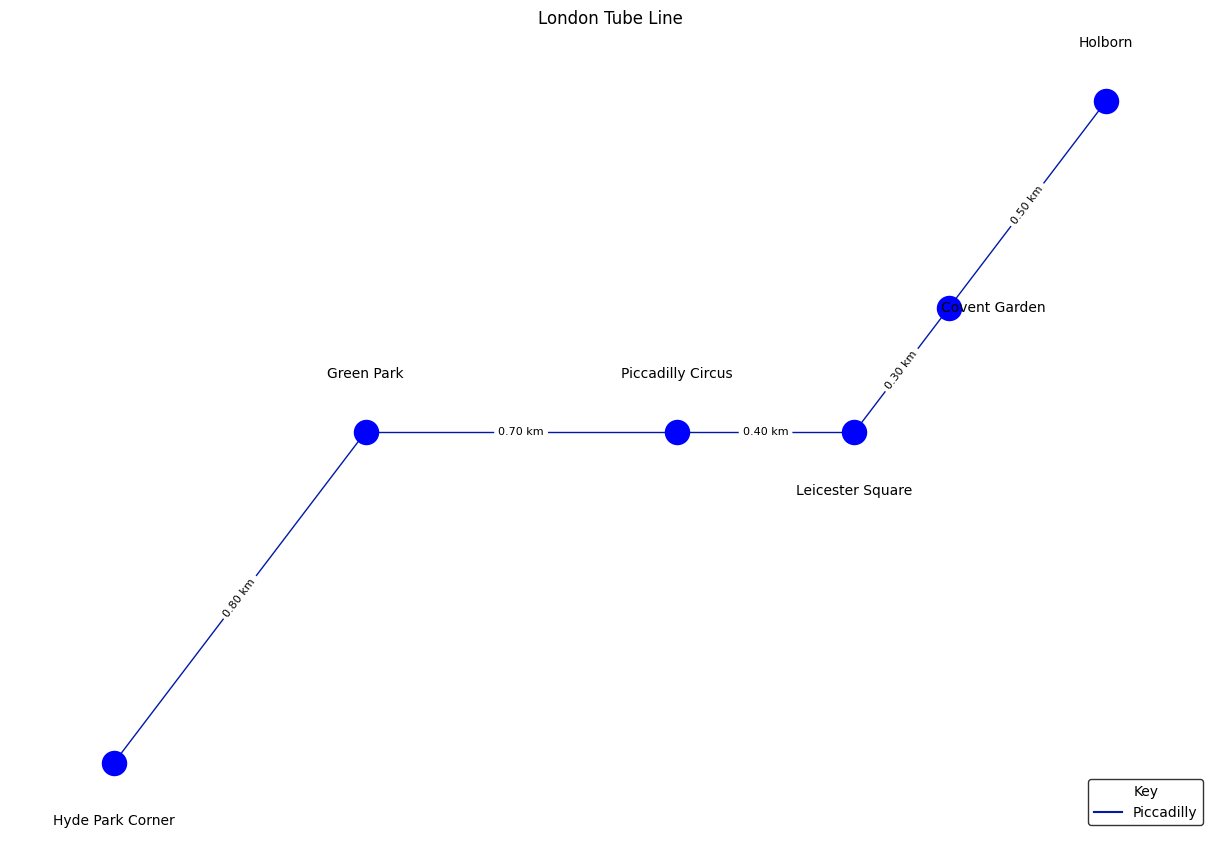

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the stations and distances
stations = [
    ("Hyde Park Corner", "Green Park", 0.8),
    ("Green Park", "Piccadilly Circus", 0.7),
    ("Piccadilly Circus", "Leicester Square", 0.4),
    ("Leicester Square", "Covent Garden", 0.3),
    ("Covent Garden", "Holborn", 0.5)
]

# Create a graph
G = nx.Graph()

# Add edges and distances to the graph
for station1, station2, distance in stations:
    G.add_edge(station1, station2, weight=distance)

# Scaling factor for proportional distances
scale = 100  # Higher scale for better visualization

# Initialize positions dictionary
positions = {}
positions["Hyde Park Corner"] = (0, 0)  # Starting point

# Define relative directions (x, y changes) for each segment
# Example: (1, 0) means move right; (0, 1) means move up
directions = [
    (np.sqrt(2)/2, np.sqrt(2)/2),  # 45-degree diagonal
    (1, 0),  # Horizontal right
    (1, 0),  # Horizontal right
    (np.sqrt(2)/2, np.sqrt(2)/2),  # 45-degree diagonal
    (np.sqrt(2)/2, np.sqrt(2)/2)   # 45-degree diagonal
]

# Calculate positions dynamically based on distances and directions
current_x, current_y = positions["Hyde Park Corner"]
for i, (station1, station2, distance) in enumerate(stations):
    dx, dy = directions[i]
    current_x += distance * scale * dx
    current_y += distance * scale * dy
    positions[station2] = (current_x, current_y)

# Define custom label position adjustments
label_pos_adjustments = {
    "Hyde Park Corner": (0, -10),
    "Green Park": (0, 10),
    "Piccadilly Circus": (0, 10),
    "Leicester Square": (0, -10),
    "Covent Garden": (10, 0),
    "Holborn": (0, 10),
}

# Adjust label positions
adjusted_positions = {
    node: (x + label_pos_adjustments.get(node, (0, 0))[0],
           y + label_pos_adjustments.get(node, (0, 0))[1])
    for node, (x, y) in positions.items()
}

# Color mapping for lines
color_mapping = {
    'piccadilly': '#0019A8'
}

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(
    G,
    pos=positions,
    with_labels=False,
    node_color="blue",
    node_size=300,
    font_size=10,
    font_weight="bold",
    edge_color=color_mapping['piccadilly']
)

# Draw node labels using adjusted positions
nx.draw_networkx_labels(
    G,
    pos=adjusted_positions,  # Use adjusted positions for labels
    font_size=10,
    font_color="black"
)

# Add edge labels (distances)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(
    G,
    pos=positions,
    edge_labels={edge: f"{dist:.2f} km" for edge, dist in edge_labels.items()},
    font_size=8,
    font_color="black"
)

# Add a legend
plt.plot([], [], color=color_mapping['piccadilly'], label="Piccadilly")  # Invisible line for legend
plt.legend(loc="lower right", title="Key", frameon=True, edgecolor="black")  # Customize legend

# Add visible borders to the plot
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)

# Set plot title
plt.title("London Tube Line")

# Show the graph
plt.show()
